## Basic Sonification Notebook for Sound School Workshop
### Produces a midi file containing a series of pitches mapped to the input data
#### Thanks to the awesome MIDITime library - https://github.com/cirlabs/miditime

In [2]:
# Import the libraries that we need, you will need to install these in your environment

from miditime.miditime import MIDITime
import pandas
import csv

In [3]:
# Define a function we will use to transform the data later, different note ranges can be added here

def data_to_pitch_tuned(value, data_min, data_max):
    # Where does this data point sit in the domain of your data? In this case the optional 'True' means the scale is reversed, so the highest value will return the lowest percentage.
    scale_pct = mymidi.linear_scale_pct(data_min, data_max, value)

    # Pick a range of notes. This allows you to play in a key.
    c_major = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
    
    #Find the note that matches your data point
    note = mymidi.scale_to_note(scale_pct, c_major)

    #Translate that note to a MIDI pitch
    midi_pitch = mymidi.note_to_midi_pitch(note)

    return midi_pitch

In [57]:
# Open up the .csv file using Pandas, change the file path to open a different file
# IDCJAC0001_086232_Data12.csv contains monthly and average rainfall for Melbourne Botanic Gardens, file downloaded from BOM
# weather.csv contains some miscellaneous weather data that can also be used


file_path = 'IDCJAC0001_086232_Data12.csv'
data = pandas.read_csv(file_path)

data.head()

,Product code,Station Number,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,IDCJAC0001,86232,1964,NaN,NaN,NaN,50.7,75.2,33.3,66.9,60.6,81.7,76.9,37.2,92.2,NaN
1,IDCJAC0001,86232,1965,14.6,0.8,16.3,121.4,80.6,29.8,71.5,100.4,49.6,21.6,66.1,88.8,661.5
2,IDCJAC0001,86232,1966,45.3,48.7,69.0,58.4,47.4,41.0,60.1,65.7,60.0,67.1,47.5,105.9,716.1
3,IDCJAC0001,86232,1967,21.2,3.9,16.6,17.5,47.9,46.1,35.0,68.0,51.5,20.3,20.1,40.1,388.2
4,IDCJAC0001,86232,1968,48.3,6.6,24.6,67.2,100.0,56.9,39.7,40.0,18.3,51.5,44.5,53.6,551.2


In [58]:
# change these variables to match the respective time series column and the variable you want to sonify

time = 'Year'
variable = 'Annual'

# Remove the columns we don't care about!

data = data[[time, variable]]

data.head()

,Year,Annual
0,1964,NaN
1,1965,661.5
2,1966,716.1
3,1967,388.2
4,1968,551.2


In [59]:
# Initialise the Midi file, the tempo and name can be set here

mymidi = MIDITime(120, 'myfile.mid', 5, 5, 1)

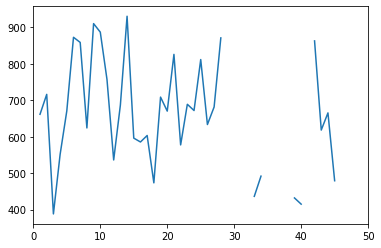

In [60]:
# Visualise our data! What do we think it will sound like

data[variable].plot()

In [61]:
# Are there missing values above? If so then run this cell to remove them as they don't play nicely with MIDI

data = data.dropna()

In [62]:
# Convert date column to datetime objects
# The format column will have to be adjust depending on the date format of your input data.
data[time] = pandas.to_datetime(data[time], format="%Y")

# Convert datetime objects to days since epoch
data[time] = data[time].apply(mymidi.days_since_epoch)

# Convert days since epoch to midi beat value
data[time] = data[time].apply(mymidi.beat)

# Set the start time
start_time = data[time][1]

In [63]:
# Go through each data value in our timeseries and turn the time value into midi timing and the variable of interest into pitch!

note_list = []

for a, b in data.itertuples(index=False):
    note_list.append([
        a - start_time,
        data_to_pitch_tuned(b, min(data[variable]), max(data[variable])),
        100,  # velocity
        1  # duration, in beats
    ])    

In [64]:
# Add a track with those notes
mymidi.add_track(note_list)

# Output the .mid file, now we can play this in our fav daw, hardware or whatevs.
mymidi.save_midi()

# For an online option try https://onlinesequencer.net/

65 0.0 1 100
67 9.990000000000002 1 100
60 19.98 1 100
64 29.98 1 100
65 40.0 1 100
71 49.99 1 100
71 59.980000000000004 1 100
65 69.98 1 100
71 80.0 1 100
71 89.99000000000001 1 100
67 99.98 1 100
62 109.98 1 100
65 120.0 1 100
71 129.99 1 100
64 139.98 1 100
64 149.98 1 100
64 160.0 1 100
62 169.99 1 100
67 179.98000000000002 1 100
65 189.98000000000002 1 100
69 200.0 1 100
64 209.99 1 100
65 219.98000000000002 1 100
65 229.98000000000002 1 100
69 240.0 1 100
65 249.99 1 100
65 259.98 1 100
71 269.98 1 100
60 369.99 1 100
62 379.98 1 100
60 429.98 1 100
60 440.0 1 100
71 459.98 1 100
64 469.98 1 100
65 480.0 1 100
62 489.99 1 100
65 509.98 1 100
62 529.99 1 100
